https://towardsdev.com/how-to-find-the-most-dominant-colors-in-an-image-in-python-using-kmeans-clustering-with-source-527ef3e6775f

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget https://post.healthline.com/wp-content/uploads/2020/09/Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.jpg

--2022-08-27 15:29:29--  https://post.healthline.com/wp-content/uploads/2020/09/Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.jpg
Resolving post.healthline.com (post.healthline.com)... 151.101.2.133, 151.101.66.133, 151.101.130.133, ...
Connecting to post.healthline.com (post.healthline.com)|151.101.2.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159070 (155K) [image/jpeg]
Saving to: ‘Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.jpg’

Do_Apples_Affect_Di 100%[===================>] 155.34K  --.-KB/s    in 0.02s   

2022-08-27 15:29:29 (6.70 MB/s) - ‘Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.jpg’ saved [159070/159070]



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils
  

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for image display
clusters = 5 # try changing it

path="/content/Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.jpg"
img = cv2.imread(path, 1)
org_img = img
print('Org image shape --> ',img.shape)
# cv2_imshow(img)
# cv2.destroyAllWindows()


Org image shape -->  (549, 732, 3)


After resizing shape -->  (200, 266, 3)


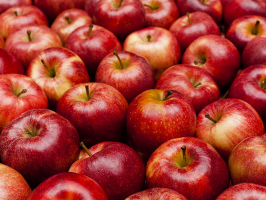

In [ ]:
img = imutils.resize(img,height=200)
print('After resizing shape --> ',img.shape)
cv2_imshow(img)
cv2.destroyAllWindows()

In [ ]:
flat_img = np.reshape(img,(-1,3))
print('After Flattening shape --> ',flat_img.shape)
# cv2_imshow(flat_img)


After Flattening shape -->  (53200, 3)


In [ ]:
kmeans = KMeans(n_clusters=clusters,random_state=0)
kmeans.fit(flat_img)

In [ ]:
dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')

percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]
p_and_c = zip(percentages,dominant_colors)
p_and_c = sorted(p_and_c,reverse=True)

mau

In [ ]:
print(p_and_c)

In [ ]:
!pip install webcolors 


In [ ]:
import webcolors
import time
start = time.time()
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

requested_colour = (141,13,16)
closest_name = closest_colour(requested_colour)

print("closest colour name:", closest_name)
print("Tempo: ", time.time() - start)

In [ ]:
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))
for i in range(clusters):
    plt.subplot(1,clusters,i+1)
    block[:] = p_and_c[i][1][::-1] # we have done this to convert bgr(opencv) to rgb(matplotlib) 
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

bar = np.ones((50,500,3),dtype='uint')
# plt.figure(figsize=(12,8))
plt.title('Proportions of colors in the image')

In [ ]:
start = 0
i = 1
for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
        bar[:,start:] = c[::-1]
    else:
        bar[:,start:end] = c[::-1]
    start = end
    i+=1
plt.imshow(bar)
plt.xticks([])
plt.yticks([])

In [ ]:
rows = 1000
cols = int((org_img.shape[0]/org_img.shape[1])*rows)
img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

copy = img.copy()
cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

final = cv2.addWeighted(img,0.1,copy,0.9,0)
cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


start = rows//2-220
for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
    start = end+20

plt.show()

cv2_imshow(final)
cv2.waitKey(0)
cv2.destroyAllWindows()
# cv2.imwrite('output.png',final)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils
filepath="/content/Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.jpg"

def color_of_image(filepath):
  clusters = 3 # try changing it
  img = cv2.imread(filepath)
  org_img = img.copy()
  img = imutils.resize(img,height=200)
  flat_img = np.reshape(img,(-1,3))
  kmeans = KMeans(n_clusters=clusters,random_state=0)
  kmeans.fit(flat_img)
  dominant_colors = np.array(kmeans.cluster_centers_,dtype='uint')
  percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]

  p_and_c = zip(percentages,dominant_colors)
  p_and_c = sorted(p_and_c,reverse=True)



  rows = 1000
  cols = int((org_img.shape[0]/org_img.shape[1])*rows)
  img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)

  copy = img.copy()
  cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+100,cols//2+110),(255,255,255),-1)

  final = cv2.addWeighted(img,0.1,copy,0.9,0)
  cv2.putText(final,'Most Dominant Colors',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)


  start = rows//2-220
  for i in range(3):
      end = start+70
      final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
      cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1,cv2.LINE_AA)
      start = end+20

  plt.show()

  cv2_imshow(final)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
# cv2.imwrite('output.png',final)

color_of_image(filepath)

In [ ]:
# Import Module
from PIL import Image
 
def most_common_used_color(img):
    # Get width and height of Image
    width, height = img.size
 
    # Initialize Variable
    r_total = 0
    g_total = 0
    b_total = 0
 
    count = 0
 
    # Iterate through each pixel
    for x in range(0, width):
        for y in range(0, height):
            # r,g,b value of pixel
            r, g, b = img.getpixel((x, y))
 
            r_total += r
            g_total += g
            b_total += b
            count += 1
 
    return (r_total/count, g_total/count, b_total/count)
 
# Read Image
img = Image.open(r'/content/Do_Apples_Affect_Diabetes_and_Blood_Sugar_Levels-732x549-thumbnail-1-732x549.jpg')
 
# Convert Image into RGB
img = img.convert('RGB')
 
# call function
common_color = most_common_used_color(img)
 
print(common_color)
# Output is (R, G, B)

In [ ]:
!wget https://afamilycdn.com/Images/Uploaded/Share/2010/08/29/010829gt55.jpg

In [ ]:

# Read Image
img = Image.open(r'/content/010829gt55.jpg')
# Convert Image into RGB
img = img.convert('RGB')
 
# call function
common_color = most_common_used_color(img)
 
print(common_color)
# Output is (R, G, B)

# Xử lý màu

In [ ]:
print(type(p_and_c[0][1]))

In [ ]:
import numpy as np
# print(type(p_and_c))
image=[]
for i in range(len(p_and_c)):
  image.append(p_and_c[i][1])


In [ ]:
image

In [ ]:
print(type(image[1]))

In [ ]:
for i in range(len(image)):
  image[i]=(image[i].tolist())

In [ ]:
print(type(image[0]))

In [ ]:
image

In [ ]:
for i in range(len(image)):
  image[i].reverse()

In [ ]:
image

In [ ]:
import webcolors
def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

In [ ]:
get_colour_name(187, 56, 40)

In [ ]:
get_colour_name((255,255,224))